# # Loading data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt


data= {'outlook':['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny','Rainy','Sunny','Overcast','Overcast','Rainy'],
'temp':['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild'],
'humidity':['High','High','High','High','Normal','Normal','Normal','High','Normal','Normal','Normal','High','Normal','High'],
'windy':['False','True','False','False','False','True','True','False','False','False','True','True','False','True'],
'play':['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']}

df= pd.DataFrame(data)
df

,outlook,temp,humidity,windy,play
0,Sunny,Hot,High,False,No
1,Sunny,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Rainy,Mild,High,False,Yes
4,Rainy,Cool,Normal,False,Yes
5,Rainy,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Sunny,Mild,High,False,No
8,Sunny,Cool,Normal,False,Yes
9,Rainy,Mild,Normal,False,Yes


# # Converting categorical data into numerical data

In [2]:
# converting categorical data into numerical data

one_hot_data = pd.get_dummies(df[ ['outlook', 'temp', 'humidity', 'windy'] ])
one_hot_data

,outlook_Overcast,outlook_Rainy,outlook_Sunny,temp_Cool,temp_Hot,temp_Mild,humidity_High,humidity_Normal,windy_False,windy_True
0,0,0,1,0,1,0,1,0,1,0
1,0,0,1,0,1,0,1,0,0,1
2,1,0,0,0,1,0,1,0,1,0
3,0,1,0,0,0,1,1,0,1,0
4,0,1,0,1,0,0,0,1,1,0
5,0,1,0,1,0,0,0,1,0,1
6,1,0,0,1,0,0,0,1,0,1
7,0,0,1,0,0,1,1,0,1,0
8,0,0,1,1,0,0,0,1,1,0
9,0,1,0,0,0,1,0,1,1,0


# # Generating decision tree

In [3]:
target= pd.DataFrame(df['play'])

# "splitter= best" means strategy used to choose the split at each node.
# "criterion= entropy" means function to measure the quality of a split. “entropy” for the information gain.

clf = tree.DecisionTreeClassifier(splitter='best',criterion='entropy')
clf_train = clf.fit(one_hot_data, target)


# #Predicting the output from decision tree classifier

In [4]:
prediction = clf_train.predict([[0,0,1,1,0,0,1,0,0,1]])
print("Is there possiblity of playing game:  ",prediction[0])

Is there possiblity of playing game:   No


# #Drawing the decision tree classifier

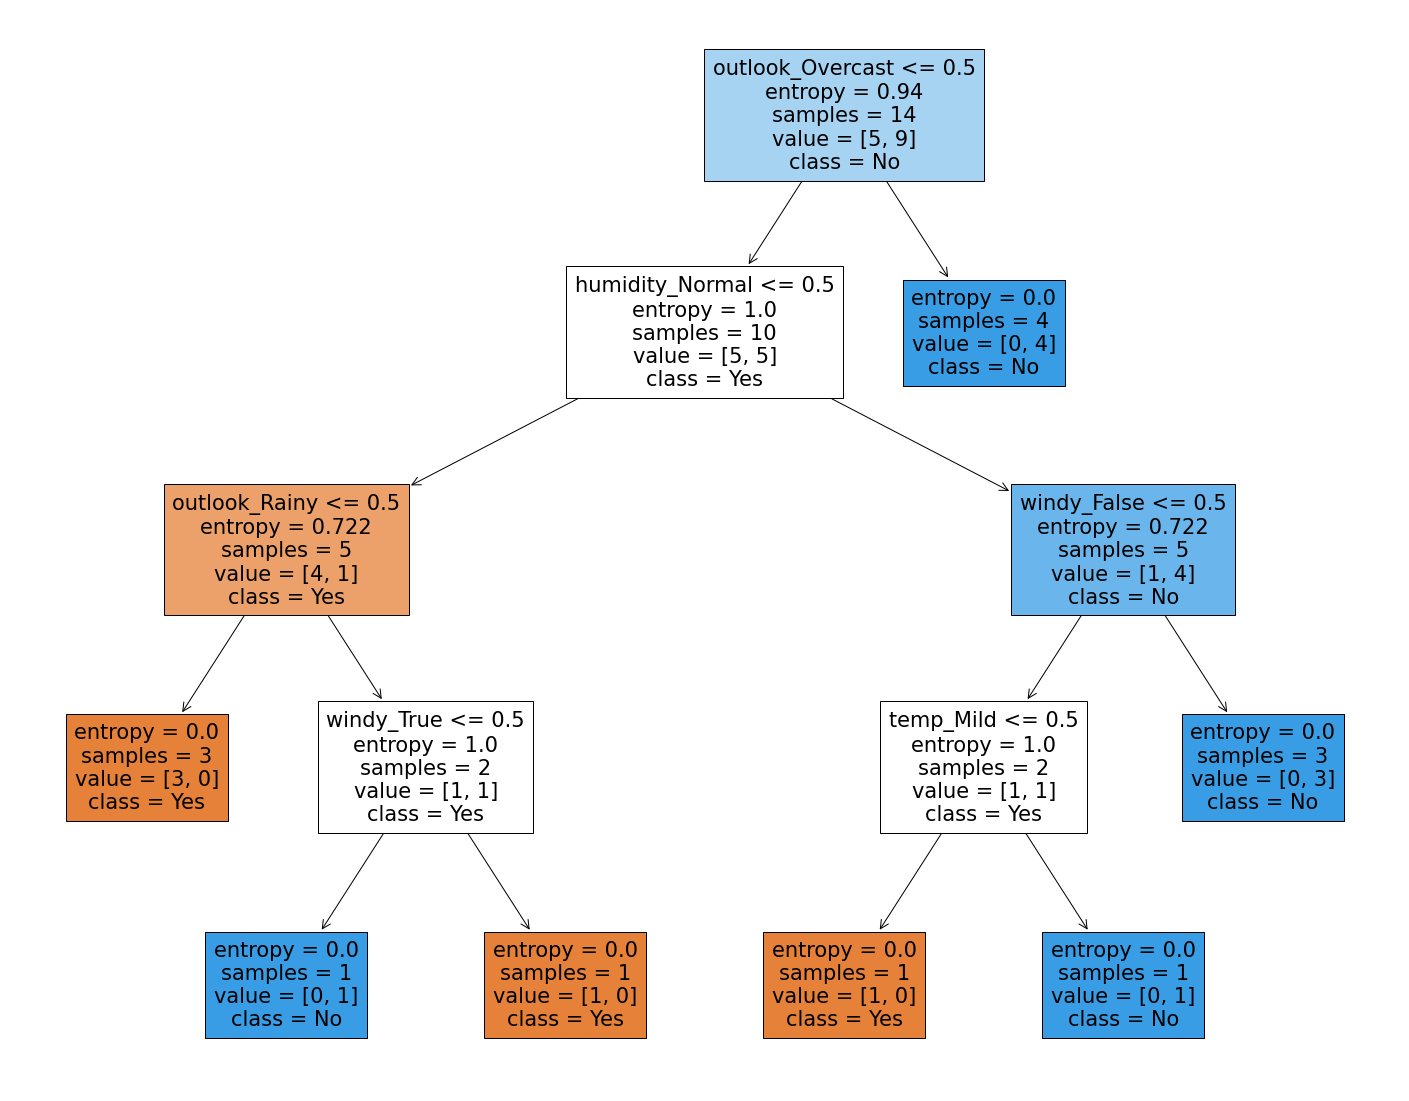

In [5]:
fn=list(one_hot_data.columns.values)
cn=['Yes', 'No']

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names=fn,class_names=cn,filled=True)